In [1]:
from djitellopy import Tello
import cv2
import time
import matplotlib.pyplot as plt

In [2]:
# load pre-trained classifier
face_cascade = cv2.CascadeClassifier('../assets/haarcascade_frontalface_default.xml')

In [3]:
# create a Tello object
me = Tello()
# connect to the Tello drone
me.connect()
# get battery to test the connection
print(me.get_battery())
# start the video stream
me.streamon()
# set the image dimensions (these are the default values)
h = 720
w = 960
# get the frame read object
frame_read = me.get_frame_read()
# wait two seconds to let the camera warm up
time.sleep(2)
# get the first frame to test
img = frame_read.frame

[INFO] tello.py - 122 - Tello instance was initialized. Host: '192.168.10.1'. Port: '8889'.
[INFO] tello.py - 437 - Send command: 'command'
[ERROR] tello.py - 457 - 'utf-8' codec can't decode byte 0xcc in position 0: invalid continuation byte
[INFO] tello.py - 437 - Send command: 'command'
[INFO] tello.py - 461 - Response command: 'ok'
[INFO] tello.py - 437 - Send command: 'streamon'
[INFO] tello.py - 461 - Response streamon: 'ok'


2


In [4]:
# check image dimensions, must be the same as the ones set
img.shape

(720, 960, 3)

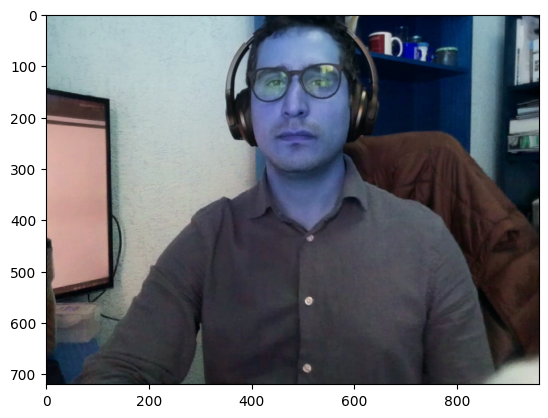

In [5]:
# plot image with default color map
plt.imshow(img)

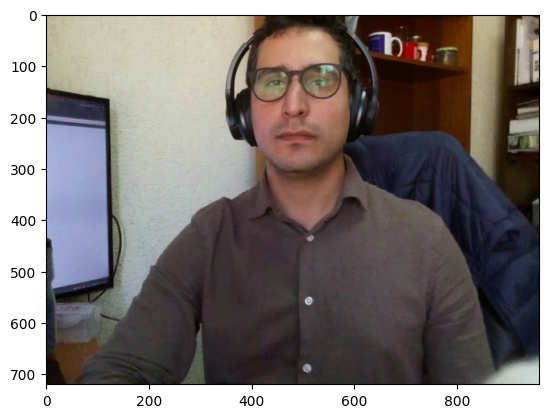

In [6]:
# the image is blue tinted, let's fix that with BGR to RGB conversion (B: Blue, G: Green, R: Red)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

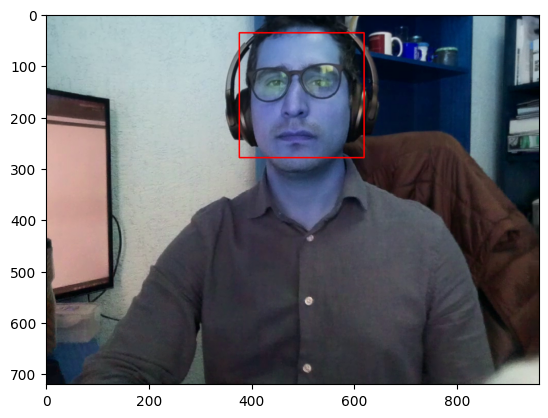

In [7]:
# test one image again
img = frame_read.frame
# convert to gray scale, since this classifier works with gray scale images
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# detect faces
faces = face_cascade.detectMultiScale(gray, 1.3, 3, minSize=(30, 30)) # there are many other options here
# show the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(img)

In [8]:
# # now do it in a loop
# while True:
#     img = frame_read.frame
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     faces = face_cascade.detectMultiScale(gray, 1.3, 3, minSize=(30, 30))
#     for (x, y, w, h) in faces:
#         cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
#     cv2.imshow('img', img)
#     # stop with q key
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break

Exception in thread Thread-5:
Traceback (most recent call last):
  File "c:\Users\promm\anaconda3\envs\tello\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\promm\anaconda3\envs\tello\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\promm\anaconda3\envs\tello\lib\site-packages\djitellopy\tello.py", line 1065, in update_frame
    self.stop()
  File "c:\Users\promm\anaconda3\envs\tello\lib\site-packages\djitellopy\tello.py", line 1074, in stop
    self.worker.join()
  File "c:\Users\promm\anaconda3\envs\tello\lib\threading.py", line 1057, in join
    raise RuntimeError("cannot join current thread")
RuntimeError: cannot join current thread
